<h1>Importuri</h1>

In [22]:
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import os
import networkx as nx
import matplotlib.colors as mcolors
import random
warnings.simplefilter('ignore')

<h1>Cod Evolutiv</h1>

In [23]:
class GA:
    def __init__(self, popSize, mutation_chance, geneSize, killRate, graph, noCommunities, fitness_type='coverage'):
        self.popSize = popSize
        self.mutation_chance = mutation_chance
        self.geneSize = geneSize
        self.killRate = killRate
        self.graph = graph
        self.noCommunities = noCommunities
        self.fitness_type = fitness_type  # tipul de fitness: 'coverage' sau 'performance'
        self.population = []

        for _ in range(popSize):
            gene = []
            for _ in range(self.geneSize):
                gene.append(round(random.uniform(0, noCommunities - 1)))
            self.population.append(gene)

    def population(self):
        return self.population

    def popSize(self):
        return self.popSize

    def combine(self, index_mother, index_father):
        mother = self.population[index_mother]
        mother = [mother[:len(mother)//2], mother[len(mother)//2:]]
        
        father = self.population[index_father]
        father = [father[:len(father)//2], father[len(father)//2:]]
        
        childA = mother[0] + father[1]
        childB = father[0] + mother[1]

        if random.random() < self.mutation_chance:
            self.mutate(childA)
        if random.random() < self.mutation_chance:
            self.mutate(childB)
        
        self.population.append(childA)
        if len(self.population) < self.popSize:
            self.population.append(childB)

    def mutate(self, entity):
        gene = round(random.uniform(-self.geneSize + 1, self.geneSize - 1))
        if gene > 0 and entity[gene] < self.noCommunities - 1:
            entity[gene] += 1
        elif gene < 0:
            gene = -gene
            if entity[gene] > 0:
                entity[-gene] -= 1

    def purge(self):
        self.population = sorted(self.population, key=lambda x: self.fitness(self.graph, x), reverse=True)
        self.population = self.population[:self.popSize - round(self.popSize * self.killRate)]

    def findBest(self):
        return sorted(self.population, key=lambda x: self.fitness(self.graph, x), reverse=True)[0]

    # Transformă genele în comunități
    def convert(self, nodes, community_indices):
        ret = [[] for _ in range(max(community_indices) + 1)]
        node_list = list(nodes)
        for i in range(len(community_indices)):
            ret[community_indices[i]].append(node_list[i])
        return ret

    # Fitness principal (alege între cele două)
    def fitness(self, G, communities):
        if self.fitness_type == 'coverage':
            return self.fitness_coverage(G, communities)
        elif self.fitness_type == 'performance':
            return self.fitness_performance(G, communities)
        else:
            raise ValueError('Unknown fitness type')

    # Fitness: coverage
    def fitness_coverage(self, G, communities):
        node_labels = list(G.nodes)
        num_intra_community_edges = sum(
            G.has_edge(i, j) for i, j in G.edges if communities[node_labels.index(i)] == communities[node_labels.index(j)]
        )
        total_edges = G.number_of_edges()
        return num_intra_community_edges / total_edges if total_edges > 0 else 0

    # Fitness: performance
    def fitness_performance(self, G, communities):
        node_labels = list(G.nodes)
        total_pairs = len(node_labels) * (len(node_labels) - 1) / 2

        # Muchii interne (corecte)
        num_intra_edges = sum(
            G.has_edge(i, j) for i, j in G.edges if communities[node_labels.index(i)] == communities[node_labels.index(j)]
        )

        # Non-muchii externe (corecte)
        num_correct_non_edges = 0
        for i in range(len(node_labels)):
            for j in range(i + 1, len(node_labels)):
                if communities[i] != communities[j] and not G.has_edge(node_labels[i], node_labels[j]):
                    num_correct_non_edges += 1

        performance = (num_intra_edges + num_correct_non_edges) / total_pairs if total_pairs > 0 else 0
        return performance

    def train(self, noEpochs):
        for epoch in range(noEpochs):
            print('Epoch', epoch + 1, '/', noEpochs)
            print('Best score:', self.fitness(self.graph, self.findBest()))
            self.purge()
            while len(self.population) < self.popSize:
                size = len(self.population)
                self.combine(random.randint(0, size - 1), random.randint(0, size - 1))


def drawGraph(G, communities):
    pos = nx.spring_layout(G)  # compute graph layout
    my_cmap = mcolors.ListedColormap(['red', 'green', 'blue', 'purple', 'pink', 'yellow'])
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=150, cmap=my_cmap, node_color=communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show()

def convert(nodes, community_indices):
    ret = [[] for _ in range(max(community_indices) + 1)]
    node_list = list(nodes)
    for i in range(len(community_indices)):
        ret[community_indices[i]].append(node_list[i])
    return ret


In [24]:
def drawGraph(G, communities):
    pos = nx.spring_layout(G)  # compute graph layout
    my_cmap = mcolors.ListedColormap(['red', 'green', 'blue','purple','pink','yellow'])
    plt.figure(figsize=(10, 10)) 
    nx.draw_networkx_nodes(G, pos, node_size=150, cmap=my_cmap, node_color = communities)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    plt.show(G)


<h1>Delfini</h1>

Epoch 1 / 50
Best score: 0.610062893081761
Epoch 2 / 50
Best score: 0.610062893081761
Epoch 3 / 50
Best score: 0.660377358490566
Epoch 4 / 50
Best score: 0.660377358490566
Epoch 5 / 50
Best score: 0.660377358490566
Epoch 6 / 50
Best score: 0.660377358490566
Epoch 7 / 50
Best score: 0.6666666666666666
Epoch 8 / 50
Best score: 0.6981132075471698
Epoch 9 / 50
Best score: 0.6981132075471698
Epoch 10 / 50
Best score: 0.6981132075471698
Epoch 11 / 50
Best score: 0.6981132075471698
Epoch 12 / 50
Best score: 0.6981132075471698
Epoch 13 / 50
Best score: 0.6981132075471698
Epoch 14 / 50
Best score: 0.6981132075471698
Epoch 15 / 50
Best score: 0.6981132075471698
Epoch 16 / 50
Best score: 0.6981132075471698
Epoch 17 / 50
Best score: 0.6981132075471698
Epoch 18 / 50
Best score: 0.6981132075471698
Epoch 19 / 50
Best score: 0.6981132075471698
Epoch 20 / 50
Best score: 0.6981132075471698
Epoch 21 / 50
Best score: 0.6981132075471698
Epoch 22 / 50
Best score: 0.6981132075471698
Epoch 23 / 50
Best score:

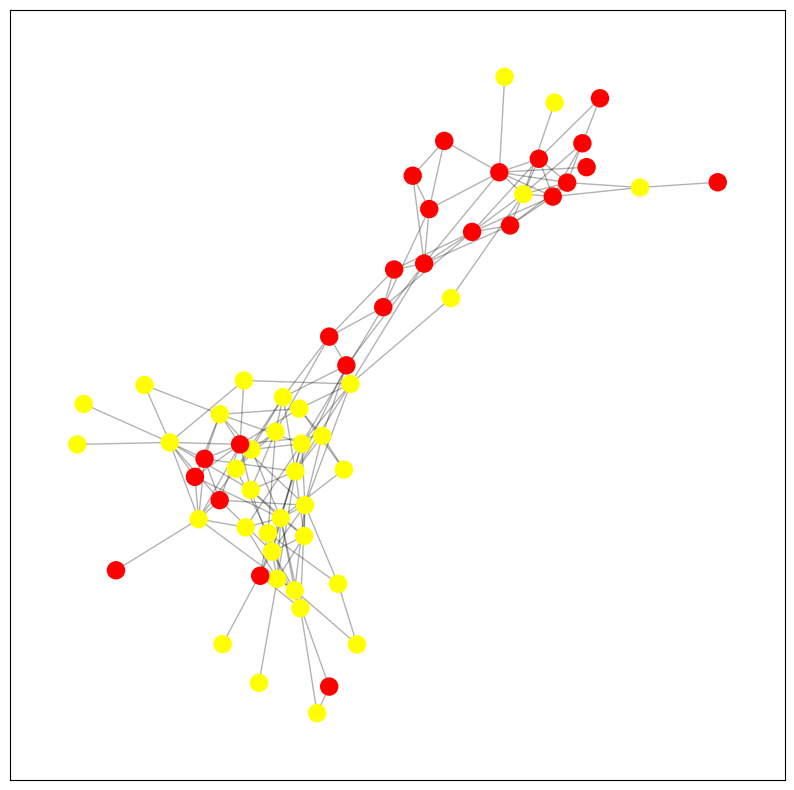

[1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
[['Beescratch', 'DN16', 'DN21', 'DN63', 'Feather', 'Gallatin', 'Jet', 'Jonah', 'Knit', 'MN105', 'MN23', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'SMN5', 'SN90', 'Thumper', 'Topless', 'TR120', 'Upbang', 'Wave', 'Zig'], ['Beak', 'Bumper', 'CCL', 'Cross', 'Double', 'Fish', 'Five', 'Fork', 'Grin', 'Haecksel', 'Hook', 'Kringel', 'MN60', 'Patchback', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN96', 'Stripes', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Vau', 'Web', 'Whitetip', 'Zap', 'Zipfel']]


In [25]:
crtDir =  os.getcwd()
filePath = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/dolphins/dolphins.gml'
G = nx.read_gml(filePath)
G = nx.Graph(G)

ga = GA(popSize=200, mutation_chance=0.01, geneSize=G.number_of_nodes(), killRate=0.5, graph=G, noCommunities=2)
ga.train(50)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Football</h1>

Epoch 1 / 100
Best score: 0.13376835236541598
Epoch 2 / 100
Best score: 0.13376835236541598
Epoch 3 / 100
Best score: 0.14192495921696574
Epoch 4 / 100
Best score: 0.15823817292006526
Epoch 5 / 100
Best score: 0.15823817292006526
Epoch 6 / 100
Best score: 0.15823817292006526
Epoch 7 / 100
Best score: 0.1598694942903752
Epoch 8 / 100
Best score: 0.16150081566068517
Epoch 9 / 100
Best score: 0.1631321370309951
Epoch 10 / 100
Best score: 0.16639477977161501
Epoch 11 / 100
Best score: 0.16639477977161501
Epoch 12 / 100
Best score: 0.16802610114192496
Epoch 13 / 100
Best score: 0.16965742251223492
Epoch 14 / 100
Best score: 0.17128874388254486
Epoch 15 / 100
Best score: 0.1729200652528548
Epoch 16 / 100
Best score: 0.1729200652528548
Epoch 17 / 100
Best score: 0.1729200652528548
Epoch 18 / 100
Best score: 0.17781402936378465
Epoch 19 / 100
Best score: 0.17944535073409462
Epoch 20 / 100
Best score: 0.17944535073409462
Epoch 21 / 100
Best score: 0.18107667210440456
Epoch 22 / 100
Best score: 

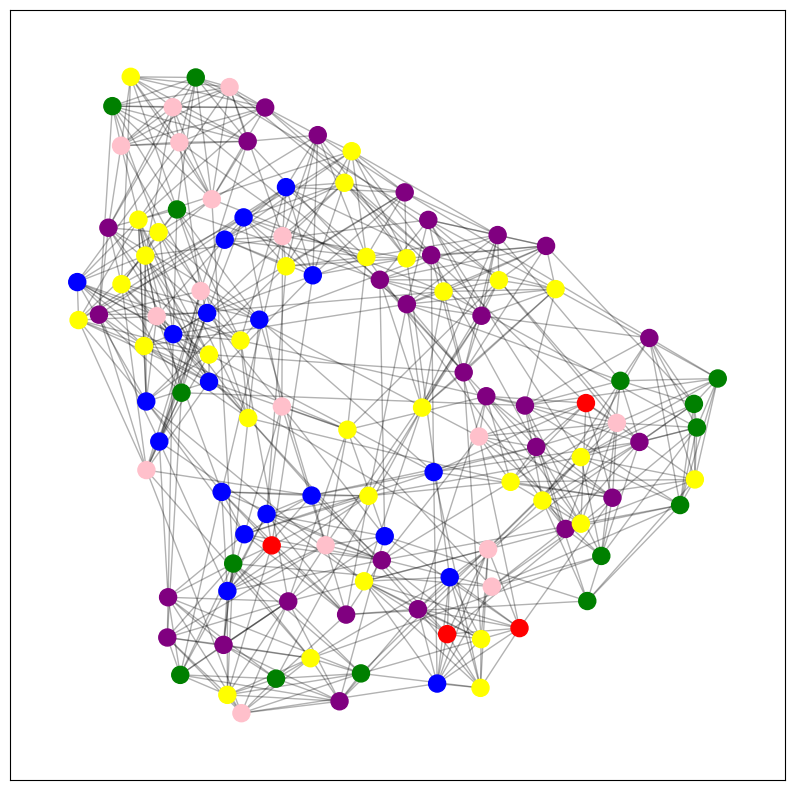

[10, 6, 6, 9, 10, 3, 9, 5, 2, 2, 11, 3, 6, 6, 2, 6, 10, 6, 2, 11, 2, 8, 2, 6, 3, 10, 9, 6, 1, 5, 8, 2, 9, 0, 9, 11, 7, 3, 6, 9, 6, 10, 2, 2, 6, 10, 10, 5, 3, 7, 8, 6, 9, 3, 2, 8, 2, 6, 9, 7, 6, 11, 2, 3, 6, 6, 3, 3, 8, 8, 11, 6, 6, 10, 9, 0, 11, 8, 8, 5, 3, 3, 5, 10, 3, 6, 3, 6, 3, 8, 6, 3, 9, 3, -1, 8, 2, 7, 7, 2, 5, 5, 9, 3, 3, 10, 9, 3, 10, 0, 10, 8, 3, 6, 10]
[['Virginia', 'SouthernMississippi', 'Maryland'], ['BoiseState'], ['ArizonaState', 'SanDiegoState', 'WesternMichigan', 'Akron', 'Alabama', 'Arizona', 'BowlingGreenState', 'Connecticut', 'EasternMichigan', 'Kent', 'Kentucky', 'Vanderbilt', 'LouisianaState', 'Marshall'], ['TexasTech', 'NorthTexas', 'ArkansasState', 'GeorgiaTech', 'Houston', 'SouthernMethodist', 'MiddleTennesseeState', 'Memphis', 'Nevada', 'Navy', 'TexasA&M', 'Oklahoma', 'Tulane', 'Tulsa', 'Army', 'AirForce', 'Clemson', 'NevadaLasVegas', 'OklahomaState', 'AlabamaBirmingham'], [], ['SouthernCalifornia', 'BostonCollege', 'OhioState', 'Temple', 'NotreDame', 'Michiga

In [26]:
crtDir =  os.getcwd()
filePath = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/football/football.gml'
G = nx.read_gml(filePath)
G = nx.Graph(G)

ga = GA(popSize=500, mutation_chance=0.05, geneSize=G.number_of_nodes(), killRate=0.8, graph=G, noCommunities=12)
ga.train(100)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Karate</h1>

Epoch 1 / 50
Best score: 0.7564102564102564
Epoch 2 / 50
Best score: 0.7564102564102564
Epoch 3 / 50
Best score: 0.7948717948717948
Epoch 4 / 50
Best score: 0.8205128205128205
Epoch 5 / 50
Best score: 0.8589743589743589
Epoch 6 / 50
Best score: 0.8589743589743589
Epoch 7 / 50
Best score: 0.8717948717948718
Epoch 8 / 50
Best score: 0.8717948717948718
Epoch 9 / 50
Best score: 0.9102564102564102
Epoch 10 / 50
Best score: 0.9230769230769231
Epoch 11 / 50
Best score: 0.9230769230769231
Epoch 12 / 50
Best score: 0.9230769230769231
Epoch 13 / 50
Best score: 0.9230769230769231
Epoch 14 / 50
Best score: 0.9230769230769231
Epoch 15 / 50
Best score: 0.9230769230769231
Epoch 16 / 50
Best score: 0.9230769230769231
Epoch 17 / 50
Best score: 0.9230769230769231
Epoch 18 / 50
Best score: 0.9230769230769231
Epoch 19 / 50
Best score: 0.9230769230769231
Epoch 20 / 50
Best score: 0.9230769230769231
Epoch 21 / 50
Best score: 0.9230769230769231
Epoch 22 / 50
Best score: 0.9230769230769231
Epoch 23 / 50
Best 

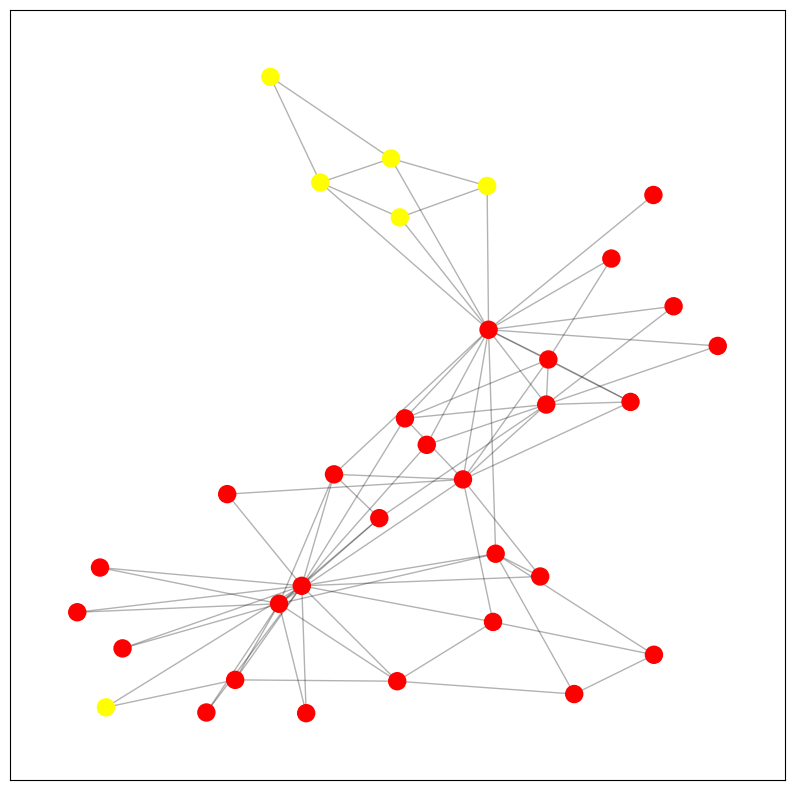

[0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[[1, 2, 3, 4, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34], [5, 6, 7, 11, 17, 27]]


In [27]:
crtDir =  os.getcwd()
filePath = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/karate/karate.gml'
G = nx.read_gml(filePath, label = 'id')
G = nx.Graph(G)

ga = GA(popSize=500, mutation_chance=0.05, geneSize=G.number_of_nodes(), killRate=0.8, graph=G, noCommunities=2)
ga.train(50)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Krebs</h1>

Epoch 1 / 50
Best score: 0.5374149659863946
Epoch 2 / 50
Best score: 0.5873015873015873
Epoch 3 / 50
Best score: 0.5873015873015873
Epoch 4 / 50
Best score: 0.5941043083900227
Epoch 5 / 50
Best score: 0.6122448979591837
Epoch 6 / 50
Best score: 0.6190476190476191
Epoch 7 / 50
Best score: 0.6258503401360545
Epoch 8 / 50
Best score: 0.6258503401360545
Epoch 9 / 50
Best score: 0.6303854875283447
Epoch 10 / 50
Best score: 0.63718820861678
Epoch 11 / 50
Best score: 0.63718820861678
Epoch 12 / 50
Best score: 0.6485260770975056
Epoch 13 / 50
Best score: 0.6598639455782312
Epoch 14 / 50
Best score: 0.6598639455782312
Epoch 15 / 50
Best score: 0.671201814058957
Epoch 16 / 50
Best score: 0.6757369614512472
Epoch 17 / 50
Best score: 0.6825396825396826
Epoch 18 / 50
Best score: 0.6848072562358276
Epoch 19 / 50
Best score: 0.691609977324263
Epoch 20 / 50
Best score: 0.6961451247165533
Epoch 21 / 50
Best score: 0.7210884353741497
Epoch 22 / 50
Best score: 0.7233560090702947
Epoch 23 / 50
Best score:

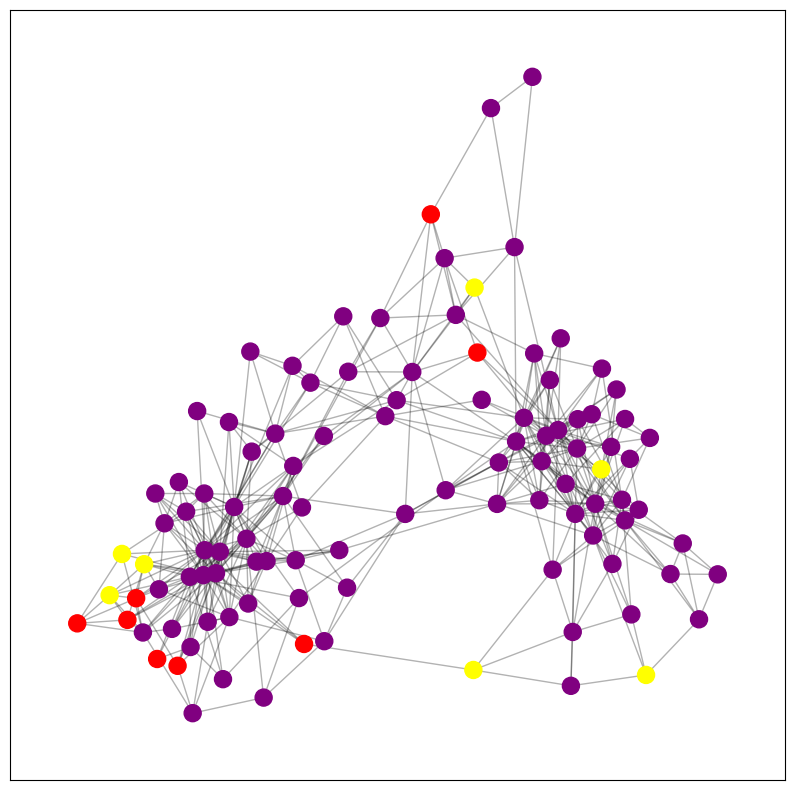

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
[['Betrayal', "The O'Reilly Factor", 'Bias', 'The Savage Nation', 'The Enemy Within', 'Power Plays', 'Colossus', 'Disarming Iraq'], ['1000 Years for Revenge', 'Bush vs. the Beltway', "Charlie Wilson's War", 'Losing Bin Laden', 'Sleeping With the Devil', 'The Man Who Warned America', 'Why America Slept', 'Ghost Wars', 'A National Party No More', 'Bush Country', 'Dereliction of Duty', 'Legacy', 'Off with Their Heads', 'Persecution', "Rumsfeld's War", 'Breakdown', 'Shut Up and Sing', 'Meant To Be', 'The Right Man', 'Ten Minutes from Normal', "Hillary's Scheme", 'The French Betrayal of America', 'Tales from the Left Coast', 'Hating America', 'The Third Terrorist', 'Endgame', 'Spi

In [28]:
crtDir =  os.getcwd()
filePath = 'C:/Users/Personal PC/Videos/UBB Info/an2/an2 sem2/Inteligenta artificiala/real/krebs/krebs.gml'
G = nx.read_gml(filePath)
G = nx.Graph(G)

ga = GA(popSize=500, mutation_chance=0.05, geneSize=G.number_of_nodes(), killRate=0.8, graph=G, noCommunities=3)
ga.train(50)

drawGraph(G,ga.findBest())
print(ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h1>Seturi de date identificate de student</h1>

<h3>1</h3>

Epoch 1 / 50
Best score: 0.6292134831460674
Epoch 2 / 50
Best score: 0.6292134831460674
Epoch 3 / 50
Best score: 0.6404494382022472
Epoch 4 / 50
Best score: 0.6853932584269663
Epoch 5 / 50
Best score: 0.6966292134831461
Epoch 6 / 50
Best score: 0.7191011235955056
Epoch 7 / 50
Best score: 0.7640449438202247
Epoch 8 / 50
Best score: 0.7865168539325843
Epoch 9 / 50
Best score: 0.7865168539325843
Epoch 10 / 50
Best score: 0.7865168539325843
Epoch 11 / 50
Best score: 0.7865168539325843
Epoch 12 / 50
Best score: 0.7865168539325843
Epoch 13 / 50
Best score: 0.7865168539325843
Epoch 14 / 50
Best score: 0.7865168539325843
Epoch 15 / 50
Best score: 0.7865168539325843
Epoch 16 / 50
Best score: 0.7865168539325843
Epoch 17 / 50
Best score: 0.7865168539325843
Epoch 18 / 50
Best score: 0.7865168539325843
Epoch 19 / 50
Best score: 0.7865168539325843
Epoch 20 / 50
Best score: 0.8539325842696629
Epoch 21 / 50
Best score: 0.8539325842696629
Epoch 22 / 50
Best score: 0.8539325842696629
Epoch 23 / 50
Best 

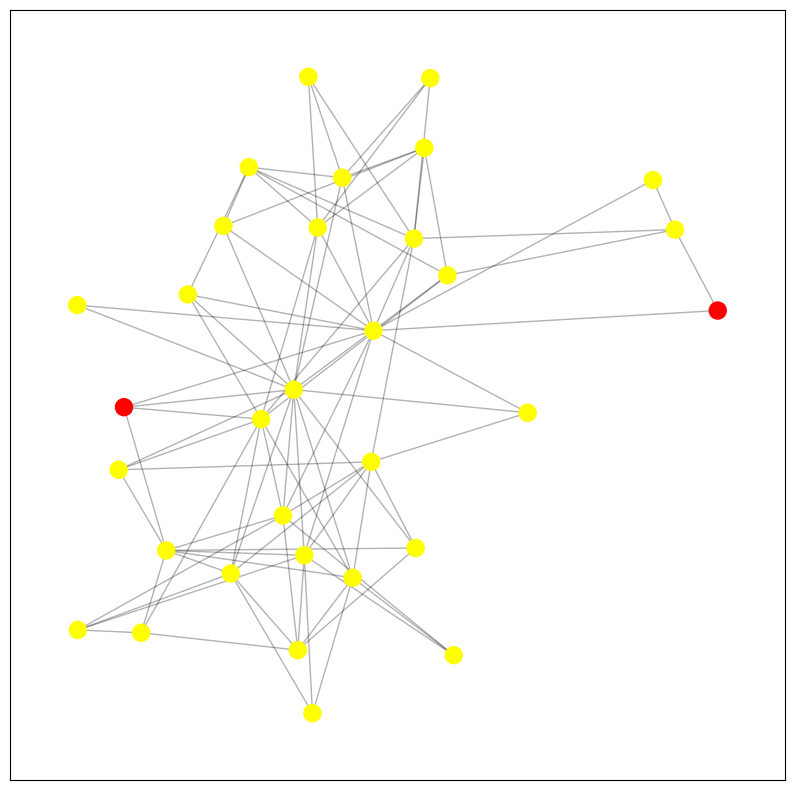

[['Ruth DeSand', 'Olivia Carleton'], ['Evelyn Jefferson', 'Laura Mandeville', 'Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd', 'Frances Anderson', 'Eleanor Nye', 'Pearl Oglethorpe', 'Verne Sanderson', 'Myra Liddel', 'Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette', 'Helen Lloyd', 'Dorothy Murchison', 'Flora Price', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']]


In [29]:
G = nx.davis_southern_women_graph()  # Example graph
ga = GA(popSize=500,mutation_chance=0.01,geneSize=G.number_of_nodes(),killRate=0.6, graph=G, noCommunities = 3)
ga.train(50)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>2</h4>

Epoch 1 / 100
Best score: 0.9
Epoch 2 / 100
Best score: 0.9
Epoch 3 / 100
Best score: 0.9
Epoch 4 / 100
Best score: 0.9
Epoch 5 / 100
Best score: 0.9
Epoch 6 / 100
Best score: 0.9
Epoch 7 / 100
Best score: 0.95
Epoch 8 / 100
Best score: 0.95
Epoch 9 / 100
Best score: 0.95
Epoch 10 / 100
Best score: 0.95
Epoch 11 / 100
Best score: 0.95
Epoch 12 / 100
Best score: 0.95
Epoch 13 / 100
Best score: 0.95
Epoch 14 / 100
Best score: 0.95
Epoch 15 / 100
Best score: 0.95
Epoch 16 / 100
Best score: 0.95
Epoch 17 / 100
Best score: 0.95
Epoch 18 / 100
Best score: 1.0
Epoch 19 / 100
Best score: 1.0
Epoch 20 / 100
Best score: 1.0
Epoch 21 / 100
Best score: 1.0
Epoch 22 / 100
Best score: 1.0
Epoch 23 / 100
Best score: 1.0
Epoch 24 / 100
Best score: 1.0
Epoch 25 / 100
Best score: 1.0
Epoch 26 / 100
Best score: 1.0
Epoch 27 / 100
Best score: 1.0
Epoch 28 / 100
Best score: 1.0
Epoch 29 / 100
Best score: 1.0
Epoch 30 / 100
Best score: 1.0
Epoch 31 / 100
Best score: 1.0
Epoch 32 / 100
Best score: 1.0
Epoch 

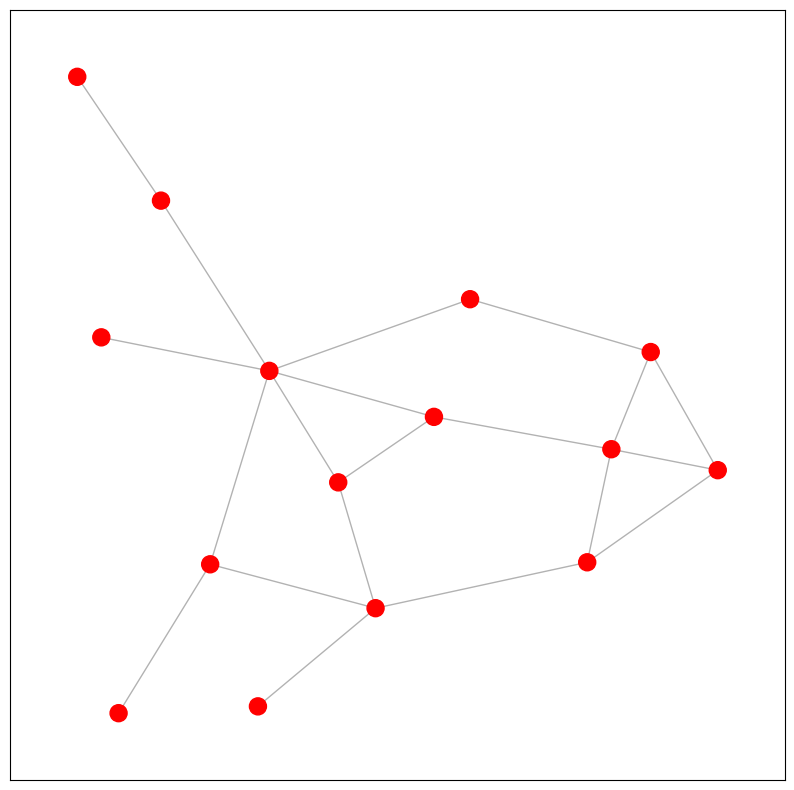

[[], ['Acciaiuoli', 'Medici', 'Castellani', 'Peruzzi', 'Strozzi', 'Barbadori', 'Ridolfi', 'Tornabuoni', 'Albizzi', 'Salviati', 'Pazzi', 'Bischeri', 'Guadagni', 'Ginori', 'Lamberteschi']]


In [30]:
G = nx.florentine_families_graph() # Example graph
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>3</h4>

Epoch 1 / 100
Best score: 0.5590551181102362
Epoch 2 / 100
Best score: 0.6456692913385826
Epoch 3 / 100
Best score: 0.6456692913385826
Epoch 4 / 100
Best score: 0.6456692913385826
Epoch 5 / 100
Best score: 0.65748031496063
Epoch 6 / 100
Best score: 0.65748031496063
Epoch 7 / 100
Best score: 0.65748031496063
Epoch 8 / 100
Best score: 0.65748031496063
Epoch 9 / 100
Best score: 0.6732283464566929
Epoch 10 / 100
Best score: 0.6732283464566929
Epoch 11 / 100
Best score: 0.6732283464566929
Epoch 12 / 100
Best score: 0.6732283464566929
Epoch 13 / 100
Best score: 0.6732283464566929
Epoch 14 / 100
Best score: 0.7007874015748031
Epoch 15 / 100
Best score: 0.7007874015748031
Epoch 16 / 100
Best score: 0.7007874015748031
Epoch 17 / 100
Best score: 0.7007874015748031
Epoch 18 / 100
Best score: 0.7007874015748031
Epoch 19 / 100
Best score: 0.7007874015748031
Epoch 20 / 100
Best score: 0.7007874015748031
Epoch 21 / 100
Best score: 0.7125984251968503
Epoch 22 / 100
Best score: 0.7244094488188977
Epoch

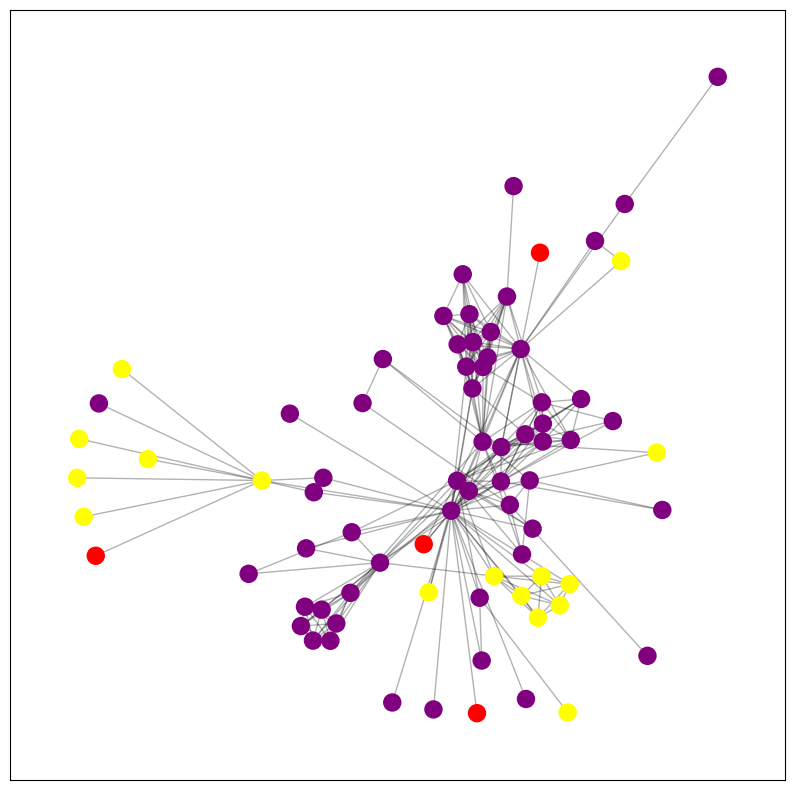

[['CountessDeLo', 'Gervais', 'Boulatruelle', 'Toussaint'], ['MlleBaptistine', 'MmeMagloire', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Perpetue', 'Simplice', 'Scaufflaire', 'Pontmercy', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Child1', 'Brujon', 'MmeHucheloup'], ['Napoleon', 'Myriel', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'Bamatabois', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Gribier', 'BaronessT', 'Child2']]


In [31]:
G = nx.les_miserables_graph()# Example graph
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>4</h4>

Epoch 1 / 100
Best score: 0.6410256410256411
Epoch 2 / 100
Best score: 0.6538461538461539
Epoch 3 / 100
Best score: 0.6538461538461539
Epoch 4 / 100
Best score: 0.717948717948718
Epoch 5 / 100
Best score: 0.717948717948718
Epoch 6 / 100
Best score: 0.7692307692307693
Epoch 7 / 100
Best score: 0.7692307692307693
Epoch 8 / 100
Best score: 0.7692307692307693
Epoch 9 / 100
Best score: 0.7692307692307693
Epoch 10 / 100
Best score: 0.7692307692307693
Epoch 11 / 100
Best score: 0.7692307692307693
Epoch 12 / 100
Best score: 0.7692307692307693
Epoch 13 / 100
Best score: 0.7692307692307693
Epoch 14 / 100
Best score: 0.8076923076923077
Epoch 15 / 100
Best score: 0.8076923076923077
Epoch 16 / 100
Best score: 0.8076923076923077
Epoch 17 / 100
Best score: 0.8076923076923077
Epoch 18 / 100
Best score: 0.8076923076923077
Epoch 19 / 100
Best score: 0.8076923076923077
Epoch 20 / 100
Best score: 0.8076923076923077
Epoch 21 / 100
Best score: 0.8333333333333334
Epoch 22 / 100
Best score: 0.8333333333333334

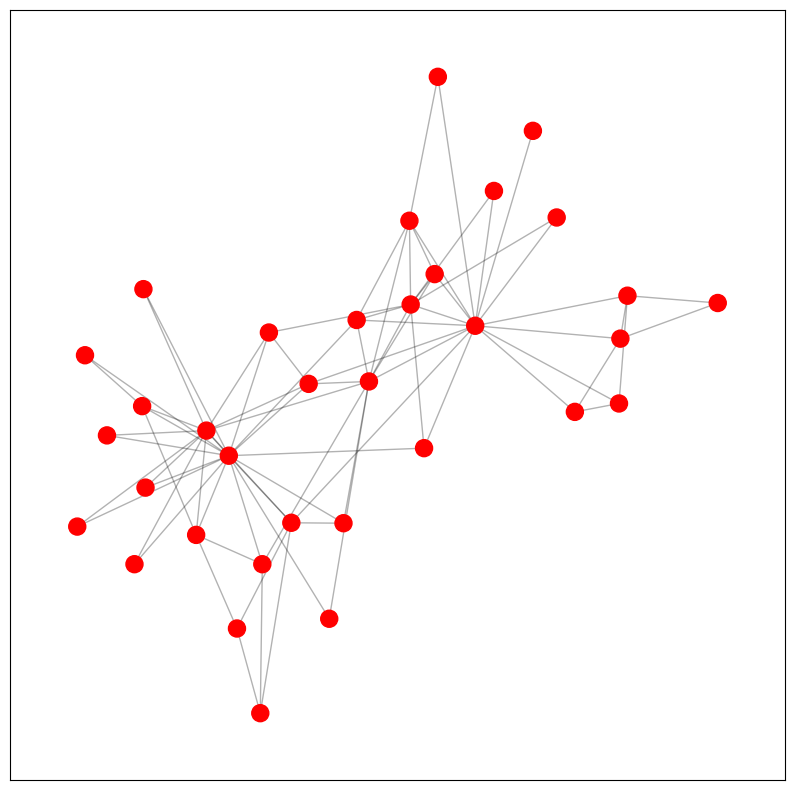

[[], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]


In [32]:
G = nx.karate_club_graph()
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>5</h4>

Epoch 1 / 100
Best score: 0.8
Epoch 2 / 100
Best score: 1.0
Epoch 3 / 100
Best score: 1.0
Epoch 4 / 100
Best score: 1.0
Epoch 5 / 100
Best score: 1.0
Epoch 6 / 100
Best score: 1.0
Epoch 7 / 100
Best score: 1.0
Epoch 8 / 100
Best score: 1.0
Epoch 9 / 100
Best score: 1.0
Epoch 10 / 100
Best score: 1.0
Epoch 11 / 100
Best score: 1.0
Epoch 12 / 100
Best score: 1.0
Epoch 13 / 100
Best score: 1.0
Epoch 14 / 100
Best score: 1.0
Epoch 15 / 100
Best score: 1.0
Epoch 16 / 100
Best score: 1.0
Epoch 17 / 100
Best score: 1.0
Epoch 18 / 100
Best score: 1.0
Epoch 19 / 100
Best score: 1.0
Epoch 20 / 100
Best score: 1.0
Epoch 21 / 100
Best score: 1.0
Epoch 22 / 100
Best score: 1.0
Epoch 23 / 100
Best score: 1.0
Epoch 24 / 100
Best score: 1.0
Epoch 25 / 100
Best score: 1.0
Epoch 26 / 100
Best score: 1.0
Epoch 27 / 100
Best score: 1.0
Epoch 28 / 100
Best score: 1.0
Epoch 29 / 100
Best score: 1.0
Epoch 30 / 100
Best score: 1.0
Epoch 31 / 100
Best score: 1.0
Epoch 32 / 100
Best score: 1.0
Epoch 33 / 100
Be

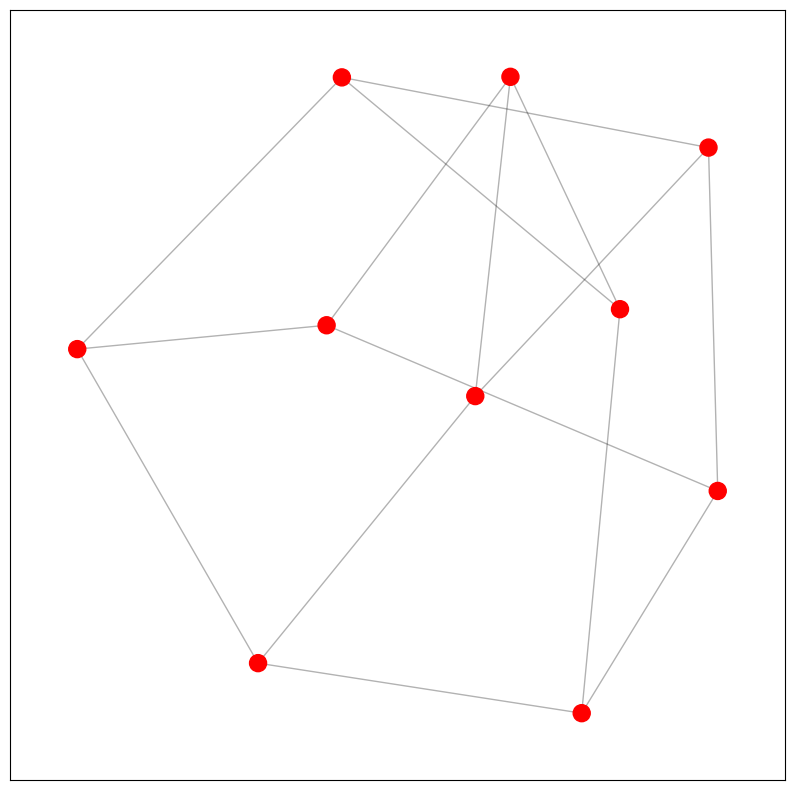

[[], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


In [33]:
G = nx.petersen_graph()
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))

<h4>6</h4>

Epoch 1 / 100
Best score: 0.5652173913043478
Epoch 2 / 100
Best score: 0.5652173913043478
Epoch 3 / 100
Best score: 0.5942028985507246
Epoch 4 / 100
Best score: 0.6666666666666666
Epoch 5 / 100
Best score: 0.6666666666666666
Epoch 6 / 100
Best score: 0.6956521739130435
Epoch 7 / 100
Best score: 0.6956521739130435
Epoch 8 / 100
Best score: 0.6956521739130435
Epoch 9 / 100
Best score: 0.7101449275362319
Epoch 10 / 100
Best score: 0.7101449275362319
Epoch 11 / 100
Best score: 0.7101449275362319
Epoch 12 / 100
Best score: 0.7101449275362319
Epoch 13 / 100
Best score: 0.7101449275362319
Epoch 14 / 100
Best score: 0.7101449275362319
Epoch 15 / 100
Best score: 0.7101449275362319
Epoch 16 / 100
Best score: 0.7101449275362319
Epoch 17 / 100
Best score: 0.7101449275362319
Epoch 18 / 100
Best score: 0.7246376811594203
Epoch 19 / 100
Best score: 0.7246376811594203
Epoch 20 / 100
Best score: 0.7246376811594203
Epoch 21 / 100
Best score: 0.7246376811594203
Epoch 22 / 100
Best score: 0.72463768115942

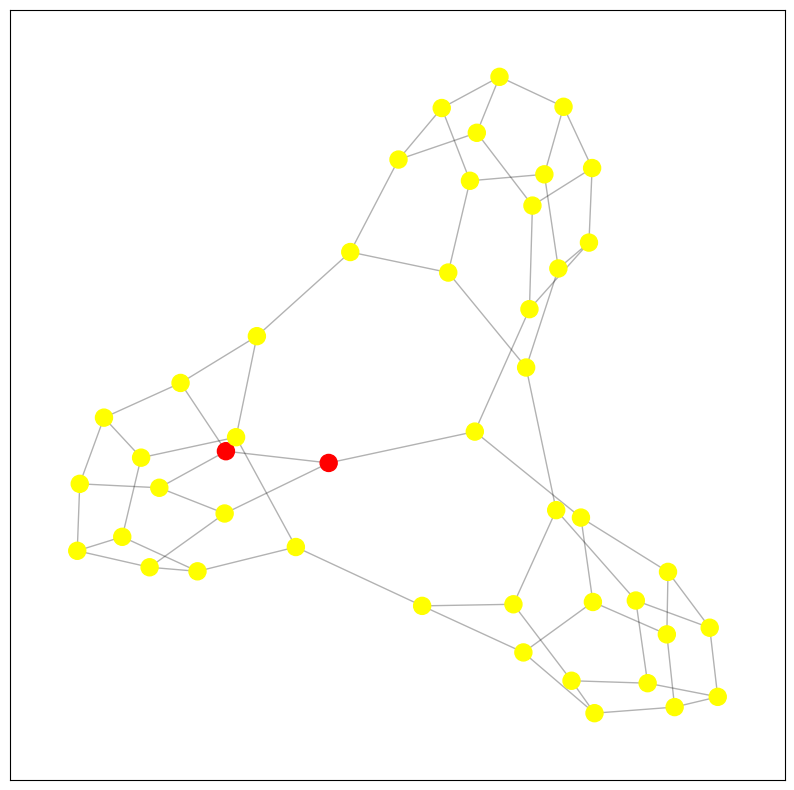

[[3, 19], [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 40, 41, 42, 43, 33, 38, 39, 44, 45, 32]]


In [34]:
G = nx.tutte_graph()
ga = GA(popSize=500,mutation_chance=0.05,geneSize=G.number_of_nodes(),killRate=0.4, graph=G, noCommunities = 3)
ga.train(100)

drawGraph(G,ga.findBest())
print(convert(G.nodes,ga.findBest()))